In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [116]:
df = pd.read_excel('train.xlsx')

In [117]:
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


In [119]:
df['Class'].unique()

array(['Стандарт', 'Первый класс', 'Второй класс', 'Same Day'],
      dtype=object)

In [120]:
df['Sub-Category'].unique()

array(['Appliances', 'Bookcases', 'Phones', 'Binders', 'Fasteners',
       'Chairs', 'Paper', 'Furnishings', 'Art', 'Storage', 'Labels',
       'Accessories', 'Tables', 'Supplies', 'Machines', 'Copiers',
       'Envelopes'], dtype=object)

In [121]:
df.describe()

,ID,Order Date,Sales
count,9800.000000,9800,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469184,22921.757737
min,1.000000,2015-01-03 00:00:00,1002.794000
25%,2450.750000,2016-05-24 00:00:00,12135.625000
50%,4900.500000,2017-06-26 00:00:00,22882.060000
75%,7350.250000,2018-05-15 00:00:00,33730.130000
max,9800.000000,2018-12-30 00:00:00,44995.410000
std,2829.160653,NaN,12601.999815


# Задание 1

In [122]:
popular_all_time = df['Sub-Category'].value_counts().head(4).reset_index()
all_sales = df['Sub-Category'].value_counts().sum()
popular_all_time['perc'] = popular_all_time['count'] / all_sales * 100
popular_all_time

,Sub-Category,count,perc
0,Binders,1492,15.224490
1,Paper,1338,13.653061
2,Furnishings,931,9.500000
3,Phones,876,8.938776


In [123]:
last_two_years = df[df['Order Date'] >= (df['Order Date'].max() - pd.DateOffset(years=2))]
popular_last_two_years = last_two_years['Sub-Category'].value_counts().head(4).reset_index()
last_two_years_sales = last_two_years['Sub-Category'].value_counts().sum()
popular_last_two_years['perc'] = popular_last_two_years['count'] / last_two_years_sales * 100
popular_last_two_years

,Sub-Category,count,perc
0,Binders,907,15.616391
1,Paper,810,13.946281
2,Furnishings,558,9.607438
3,Phones,511,8.798209


In [124]:
last_year = df[df['Order Date'] >= (df['Order Date'].max() - pd.DateOffset(years=1))]
popular_last_year = last_year['Sub-Category'].value_counts().head(4).reset_index()
last_year_sales = last_year['Sub-Category'].value_counts().sum()
popular_last_year['perc'] = popular_last_year['count'] / last_year_sales * 100
popular_last_year

,Sub-Category,count,perc
0,Binders,496,15.154293
1,Paper,454,13.871066
2,Furnishings,310,9.471433
3,Phones,291,8.890926


In [125]:
data = pd.DataFrame({
    'Sub-Category': popular_all_time['Sub-Category'],
    'За всё время': popular_all_time['perc'],
    'Последние 2 года': popular_last_two_years['perc'],
    'Последний год': popular_last_year['perc']
})

data_percent = data.set_index('Sub-Category').T

<ipython-input-126-ea85a1b50b8e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Figure size 1600x800 with 0 Axes>

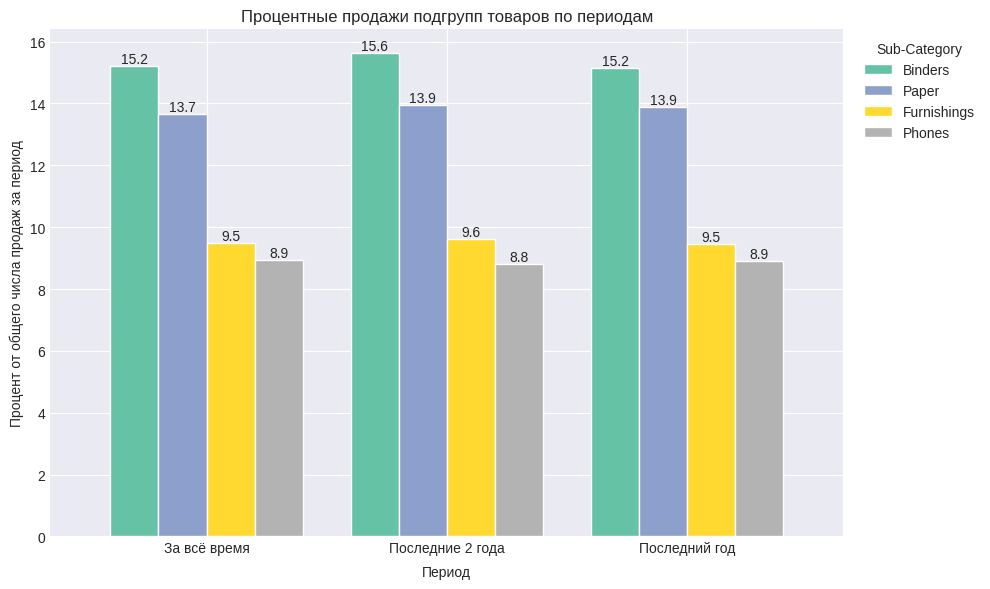

In [126]:
plt.figure(figsize=(16, 8))
plt.style.use('seaborn-darkgrid')

ax = data_percent.plot(kind='bar', width=0.8, figsize=(10, 6), cmap='Set2')

plt.title('Процентные продажи подгрупп товаров по периодам')
plt.xlabel('Период', labelpad=7)
plt.ylabel('Процент от общего числа продаж за период')

plt.legend(title='Sub-Category', bbox_to_anchor=(1.01, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Как мы видим, подкатегории Binder, Paper, Furnishings и Phones являются самыми популярными на протяжении всего времи и продолжают быть самыми продоваемыми за последний год. Binders и Parer занимают около 29-30% от всех продаж,
Furnishings и Phones занимают ещё около 20% и того, эти четыре категории покрывают почти половину прибыли компании. Они не теряют свой спрос на протяжении всего времени.

# Задание 2

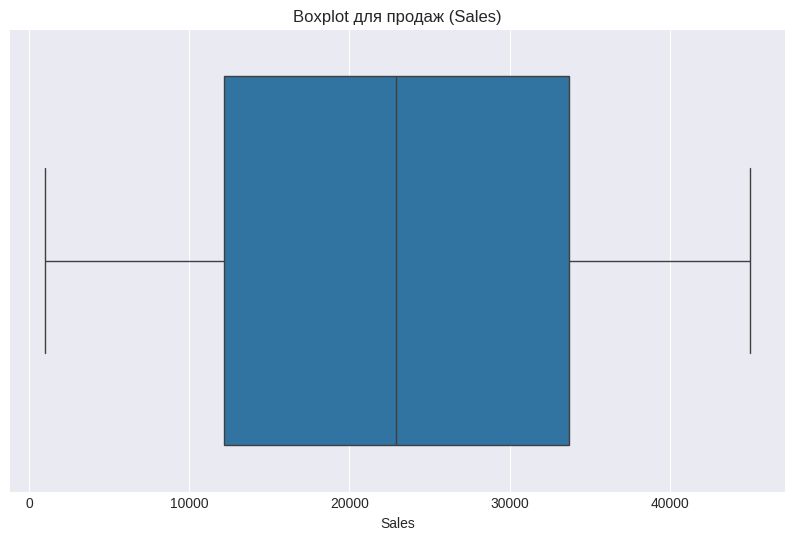

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot для продаж (Sales)')
plt.show()

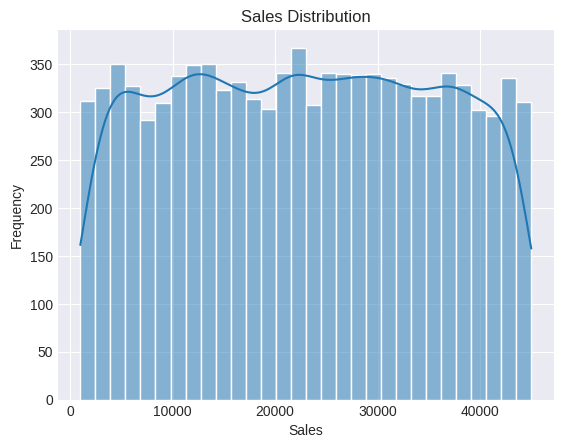

In [128]:
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [129]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [130]:
filtered_df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

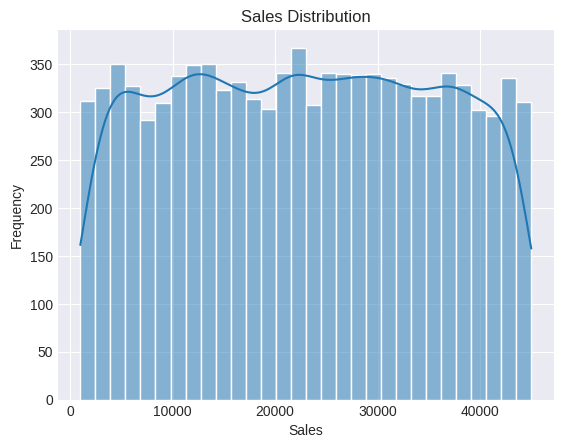

In [131]:
sns.histplot(filtered_df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

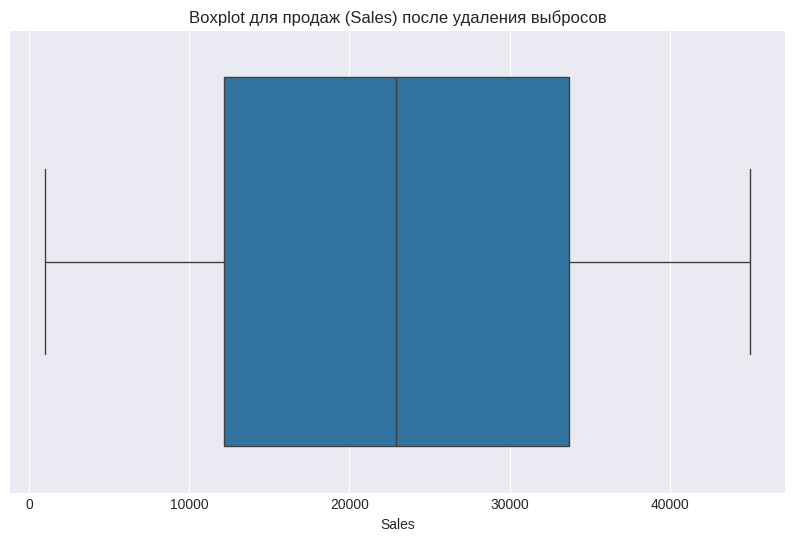

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Sales'])
plt.title('Boxplot для продаж (Sales) после удаления выбросов')
plt.show()

Исходя из того, что я вижу на гистограмме и boxplot, в данных нет выбросов и аномалий, все данные являются максимально полезными для анализа.  

# Задание 3

In [133]:
df['Sale_group'] = pd.qcut(df['Sales'], q=3, labels=['Маленькие', 'Средние', 'Высокие'])

In [134]:
df[df['Sale_group'] == 'Маленькие'].head(10)

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,Маленькие
5,1298,2018-12-30,Стандарт,Калиниград,Binders,7366.876,Маленькие
7,1878,2018-12-29,Стандарт,Калиниград,Chairs,11542.820,Маленькие
8,1879,2018-12-29,Стандарт,Калиниград,Phones,1783.405,Маленькие
10,4240,2018-12-29,Стандарт,Урал,Paper,14612.860,Маленькие
28,6090,2018-12-28,Второй класс,Калиниград,Binders,4491.100,Маленькие
29,6150,2018-12-28,Первый класс,Калиниград,Chairs,6451.790,Маленькие
30,6819,2018-12-28,Стандарт,Урал,Binders,12404.170,Маленькие
32,6821,2018-12-28,Стандарт,Урал,Chairs,6393.672,Маленькие
38,2570,2018-12-27,Same Day,Владивосток,Phones,6183.071,Маленькие


In [135]:
grouped_data = df.groupby(['Region', 'Sale_group']).agg({
    'Sales': ['count', 'sum', 'mean']
}).reset_index()

grouped_data.columns = ['Region', 'Sale_group', 'Count', 'Total_Sales(mil)', 'Average_Sales']

grouped_data['Total_Sales(mil)'] = grouped_data['Total_Sales(mil)'] / 1_000_000
grouped_data['Total_Sales(mil)'] = grouped_data['Total_Sales(mil)'].round(2)

<ipython-input-135-5b05c6ea6170>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Region', 'Sale_group']).agg({


In [136]:
grouped_data

,Region,Sale_group,Count,Total_Sales(mil),Average_Sales
0,Владивосток,Маленькие,945,7.83,8286.515222
1,Владивосток,Средние,884,20.31,22974.767613
2,Владивосток,Высокие,956,35.81,37460.497312
3,Калиниград,Маленькие,1038,8.87,8548.667623
4,Калиниград,Средние,1093,25.15,23012.267795
5,Калиниград,Высокие,1009,37.90,37566.277532
6,Москва,Маленькие,518,4.26,8217.246938
7,Москва,Средние,536,12.26,22865.475168
8,Москва,Высокие,544,20.38,37461.806820
9,Урал,Маленькие,766,6.42,8380.229930


In [137]:
most_profitable_group = grouped_data.loc[grouped_data['Total_Sales(mil)'].idxmax()]
print("Наиболее прибыльная группа:")
print(most_profitable_group)

Наиболее прибыльная группа:
Region                Калиниград
Sale_group               Высокие
Count                       1009
Total_Sales(mil)            37.9
Average_Sales       37566.277532
Name: 5, dtype: object


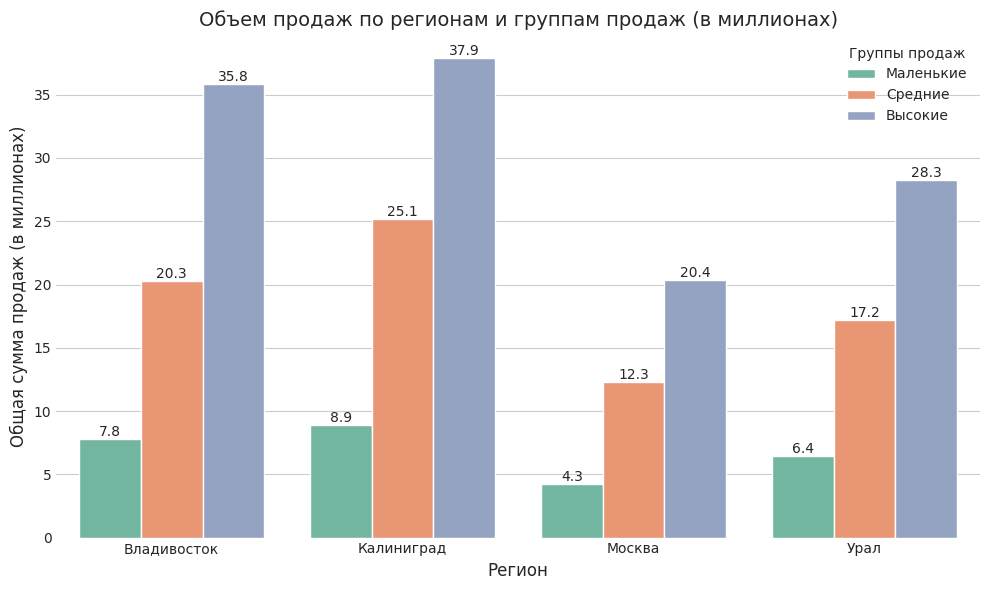

In [138]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')


ax = sns.barplot(x='Region', y='Total_Sales(mil)', hue='Sale_group', data=grouped_data, palette='Set2')

plt.title('Объем продаж по регионам и группам продаж (в миллионах)', fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Общая сумма продаж (в миллионах)', fontsize=12)

plt.legend(title='Группы продаж', fontsize=10)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

Владивосток и Каининград являются самыми прибыльными регонами, после них идет Урал и Москва. Москва является самым неприбыльным регионаом, Высокие продажи в москве на 5 млн. меньше чем в Калининграде Средние продажи.

Меньше 1/4 прибыли каждого региона уходит на маленькие продажи. Около 1/3 прибыли уходит на средние продажи. Оставшая половина всего обьёма - это группа "Высокие продажи".
